# CREDIT EDA Case Study

### Business Understanding:
#### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

 

In [2]:
#IMPORTING ALL THE REQUIRED LIBRARIES:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#LOADING THE APPLICATION DATA:
loan=pd.read_csv(r"E:\data science\EDA_CASE_STUDY\application_data.csv")
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#NORMAL ROUTINE CHECK OF THE DATA:
loan.shape   #no. of rows and columns of the application data.

(307511, 122)

In [5]:
loan.info() #all other information of application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
loan.dtypes #checking the data types of each column of application data.

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Identify the missing data and use the appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

In [7]:
#Removing high percentage of MISSING VALUE:

percent=100*(loan.isnull().sum(axis=0)/len(loan))    #calculating percentage of missing values
req_cols=percent[percent<50].index     #removing the columns with missing percent more than 50%
loan=loan[req_cols] #ignoring the columns with high missing value.
loan.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
cols=percent[percent>10].index & percent[percent<15].index # columns qith missing percent between 10 to 15.
cols


Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### The above columns with less percent of missing values can be imputed with 0 and say that there was no data gathered for these variables.

In [9]:
cols=percent[percent>0].index & percent[percent<10].index #columns with missing percent between 0 to 10.
cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

### For these columns with missing percent between 0 to 10 , there will not be any imputation as it will make the job more tedious. So leaving this variables as it is.

In [10]:
#checking the columns with data type as'object'.
list(loan.select_dtypes(['object']).columns)


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [11]:
#checking the columns with data type as'float64'.
list(loan.select_dtypes(['float64']).columns)


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [12]:
#checking the columns with data type as'int64'.
list(loan.select_dtypes(['int64']).columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [13]:
#CONSIDERING ONLY 20-30 COLUMNS FOR THE EASE OF ANALYSIS:
#creating a new dataframe for those columns.
new_df=loan[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
        'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6']]
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,Business Entity Type 3,0.262949,0.139376,No,1,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,NaN,No,1,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,Government,0.555912,0.729567,NaN,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,0,0,Business Entity Type 3,0.650442,NaN,NaN,1,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,1,Religion,0.322738,NaN,NaN,0,0,0,0


In [14]:
#routine check of the new dataframe :
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,12.063419,0.078173,0.230454,5.143927e-01,0.510853,0.710023,0.000081,0.015115,0.088055
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,3.265832,0.268444,0.421124,1.910602e-01,0.194844,0.453752,0.009016,0.122010,0.283376
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,10.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,12.000000,0.000000,0.000000,5.659614e-01,0.535276,1.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,14.000000,0.000000,0.000000,6.636171e-01,0.669057,1.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,23.000000,1.000000,1.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000


In [15]:
#Changing datatypes of few columns:
new_df['DAYS_REGISTRATION'] = new_df['DAYS_REGISTRATION'].astype(np.int64)
new_df['DAYS_REGISTRATION'].dtypes


dtype('int64')

### REPORT: Only 'Days_registration' column has datatype as float64. We need to change the data type to int64. The other columns have correct datatypes, hence there is no need to change their Datatypes.

In [16]:
#identifying the categorical and continuous columns:
new_df.nunique().sort_values()

FLAG_DOCUMENT_6                    2
FLAG_DOCUMENT_4                    2
REG_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY             2
FLAG_DOCUMENT_5                    2
EMERGENCYSTATE_MODE                2
FLAG_DOCUMENT_3                    2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CODE_GENDER                        3
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
HOUR_APPR_PROCESS_START           24
ORGANIZATION_TYPE                 58
REGION_POPULATION_RELATIVE        81
EXT_SOURCE_3                     814
AMT_GOODS_PRICE                 1002
AMT_INCOME_TOTAL                2548
A

## Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

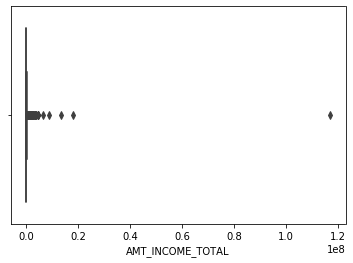

In [17]:
#IDENTIFYING OUTLIERS:

sns.boxplot(new_df['AMT_INCOME_TOTAL'])

### The AMT_INCOME_TOTAL column has some outliers present. We need to remove those Outliers. We need to remove data at the 99th percentile.

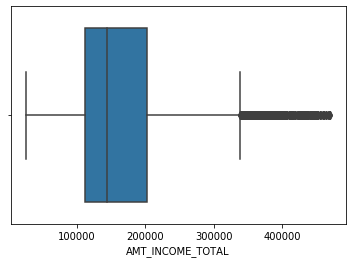

In [18]:
q = new_df['AMT_INCOME_TOTAL'].quantile(0.99)
new_df=new_df[new_df['AMT_INCOME_TOTAL'] < q]
sns.boxplot(new_df['AMT_INCOME_TOTAL'])

### REPORT: This shows that the total income ranges between 10000 and 20000 only which is a lower range.

Text(0.5, 1.0, 'detecting outliers')

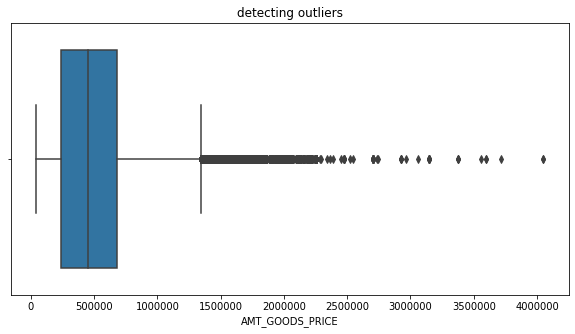

In [19]:
#Checking Outlier for AMT_GOODS_PRICE.
plt.figure(figsize=(10,5))
sns.boxplot(new_df['AMT_GOODS_PRICE'])
plt.title('detecting outliers')

Text(0.5, 1.0, 'Removing Outliers')

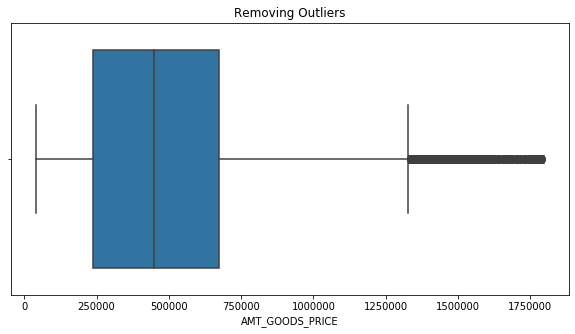

In [20]:
plt.figure(figsize=(10,5))
q = new_df['AMT_GOODS_PRICE'].quantile(0.99)
new_df=new_df[new_df['AMT_GOODS_PRICE'] < q]
sns.boxplot(new_df['AMT_GOODS_PRICE'])
plt.title('Removing Outliers')

### REPORT: The prices of the good are spread above 250000 and below 750000. 

Text(0.5, 1.0, 'Detecting Outliers')

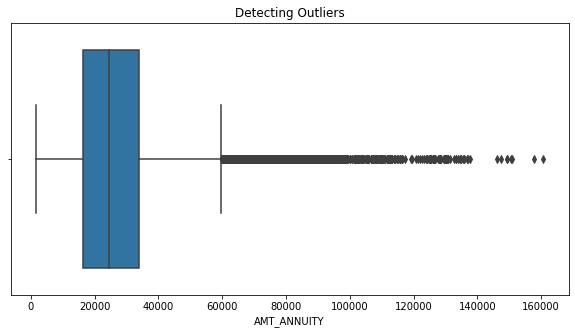

In [21]:
#Checking Outliers for AMT_ANNUITY variable:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['AMT_ANNUITY'])
plt.title('Detecting Outliers')


Text(0.5, 1.0, 'Removing Outliers')

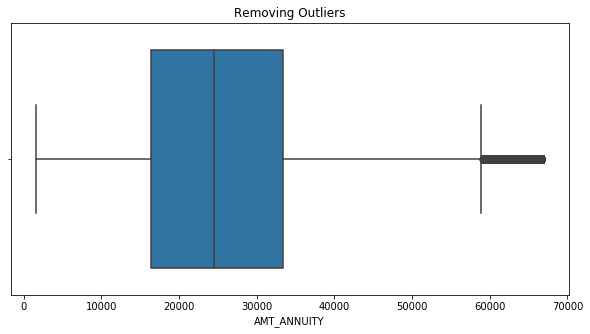

In [22]:
#Removing the outliers:
plt.figure(figsize=(10,5))
q = new_df['AMT_ANNUITY'].quantile(0.99)
new_df=new_df[new_df['AMT_ANNUITY'] < q]
sns.boxplot(new_df['AMT_ANNUITY'])
plt.title('Removing Outliers')

### REPORT: It is observed that the annuity amount is approximately in the range 15000 and 35000.

## Identify if there is data imbalance in the data. Find the ratio of data imbalance.

In [23]:
#PERCENTAGE OF PEOPLE WHO PAY THE LOAN AND WHO DOES NOT PAY THE LOAN:
100*new_df['TARGET'].value_counts(normalize=True)
print("Percentage for Target=1 :",100*new_df['TARGET'].value_counts(normalize=True)[0])
print("Percentage for Target=0 :",100*new_df['TARGET'].value_counts(normalize=True)[1])

Percentage for Target=1 : 91.80699764418463
Percentage for Target=0 : 8.193002355815374


In [24]:
#RATIO OF IMBALANCE:
ratio=(100*new_df['TARGET'].value_counts(normalize=True)[0])/(100*new_df['TARGET'].value_counts(normalize=True)[1])
print("Ratio of imbalance:",ratio)

Ratio of imbalance: 11.205537806176785


Text(0.5, 1.0, 'Data Imbalance')

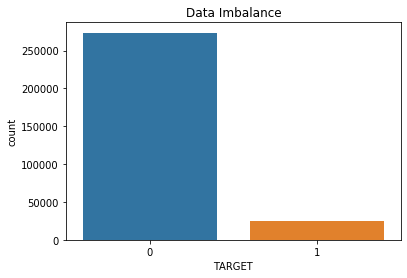

In [25]:
#Visualization of Imbalance using hist plot
sns.countplot(x='TARGET',data=new_df)
plt.title('Data Imbalance')

## Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

### SEGMENTED ANALYSIS:

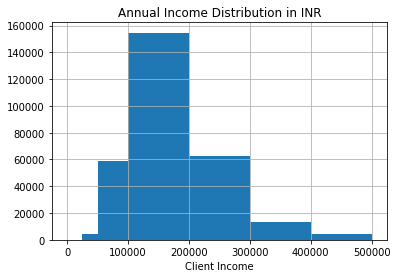

In [26]:

#BINNING THE DATA:

new_df['AMT_INCOME_TOTAL'].hist(bins=[0,25000,50000,100000,200000,300000,400000,500000])
plt.title('Annual Income Distribution in INR');
plt.xlabel('Client Income');

#### The AMT_INCOME_TOTAL variable (continuous) is distributed equally into 'BINS'.

Text(0.5, 0, 'Age')

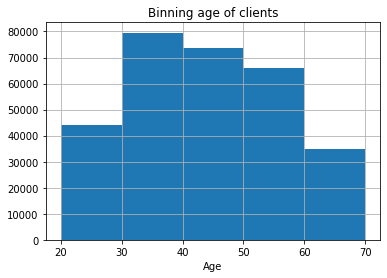

In [27]:
#Derived a new variable'AGE' from 'DAYS_BIRTH' column.
new_df['AGE'] = new_df['DAYS_BIRTH'] / -365
new_df['AGE'].hist(bins=[20,30,40,50,60,70])
plt.title('Binning age of clients')
plt.xlabel('Age')

#### A new varibale AGE is derived from the DAYS_BIRTH column and the Age variable is binned.

In [28]:
#Dividing the 'loan' dataframe in two different dataframes based on TARGET variable:
#1st dataframe
defaulter=new_df[new_df['TARGET']==1]
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,Laborers,1.0,WEDNESDAY,10,0,0,Business Entity Type 3,0.262949,0.139376,No,1,0,0,0,25.920548
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573,-1827,Cooking staff,1.0,MONDAY,9,0,0,Business Entity Type 3,0.548477,0.190706,Yes,1,0,0,0,51.298630
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182,-1029,Laborers,2.0,TUESDAY,9,0,0,Business Entity Type 3,0.306841,0.320163,No,1,0,0,0,47.895890
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45,-4409,Sales staff,2.0,THURSDAY,11,0,0,Self-employed,0.674203,0.399676,NaN,1,0,0,0,36.668493
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391,-4199,NaN,2.0,THURSDAY,10,0,0,XNA,0.023952,0.720944,NaN,0,0,0,1,67.928767


In [29]:
non_defaulter=new_df[new_df['TARGET']==0]
non_defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,AGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,NaN,No,1,0,0,0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,Laborers,1.0,MONDAY,9,0,0,Government,0.555912,0.729567,NaN,0,0,0,0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,Laborers,2.0,WEDNESDAY,17,0,0,Business Entity Type 3,0.650442,NaN,NaN,1,0,0,0,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,Core staff,1.0,THURSDAY,11,0,1,Religion,0.322738,NaN,NaN,0,0,0,0,54.608219
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970,-477,Laborers,2.0,WEDNESDAY,16,0,0,Other,0.354225,0.621226,NaN,1,0,0,0,46.413699


### UNIVARIATE ANALYSIS:

Text(0.5, 1.0, 'Univariate Analysis of AGE of NON-DEFAULTERS')

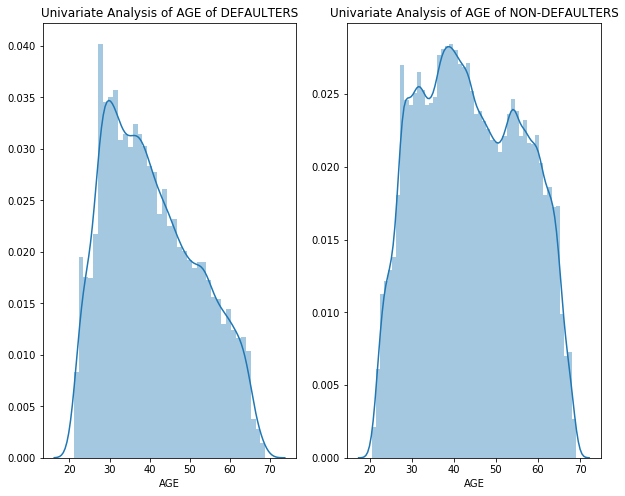

In [30]:
#UNIVARIATE ANALYSIS: (CONTINUOUS)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(defaulter['AGE'],hist=True)
plt.title('Univariate Analysis of AGE of DEFAULTERS')
plt.subplot(1,2,2)
sns.distplot(non_defaulter['AGE'],hist=True)
plt.title('Univariate Analysis of AGE of NON-DEFAULTERS')

#### REPORT: The non-defaulter clients are mostly between the age range 40 to 50. The Defaulters with age range between 20-30 are less likley to pay the loan.

Text(0.5, 1.0, 'Univariate Analysis of no.of family members of Non-DEFAULTERS')

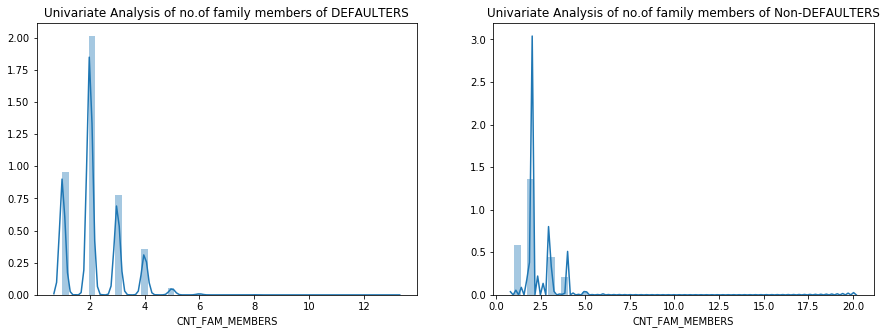

In [31]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(defaulter['CNT_FAM_MEMBERS'],hist=True)
plt.title('Univariate Analysis of no.of family members of DEFAULTERS')
plt.subplot(1,2,2)
sns.distplot(non_defaulter['CNT_FAM_MEMBERS'],hist=True)
plt.title('Univariate Analysis of no.of family members of Non-DEFAULTERS')

#### REPORT: The clients who face difficulties in paying the loan have more number of members in thier families. Hence this can be a driving factor for the Defaulters to not pay the loan on time.

Text(0.5, 1.0, 'Credit amount of loan of Non-Defaulters')

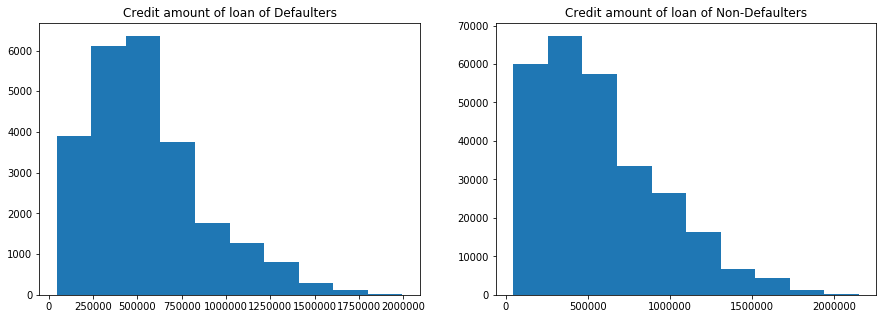

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(defaulter['AMT_CREDIT'])
plt.title('Credit amount of loan of Defaulters')
plt.subplot(1,2,2)
plt.hist(non_defaulter['AMT_CREDIT'])
plt.title('Credit amount of loan of Non-Defaulters')

#### REPORT: The credit amount of the loan for the Defaulters is less than the Non-Defaulters. This may be due to not repaying the laon on time.

Text(0.5, 1.0, 'Count of children:NON-DEFAULTERS')

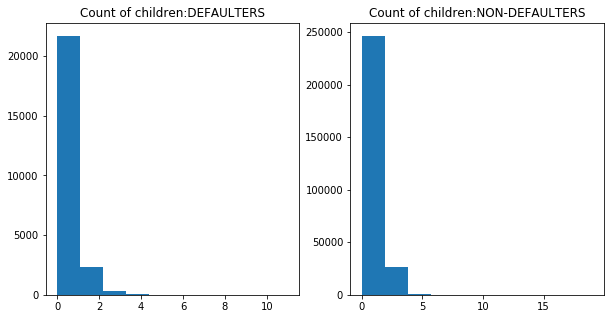

In [33]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(defaulter['CNT_CHILDREN'])
plt.title('Count of children:DEFAULTERS')
plt.subplot(1,2,2)
plt.hist(non_defaulter['CNT_CHILDREN'])
plt.title('Count of children:NON-DEFAULTERS')

#### REPORT: There is no such significant difference in the count of children for Defaulters and Non-defaulters. 

Text(0.5, 1.0, 'Price of goods: NON-DEFAULTERS')

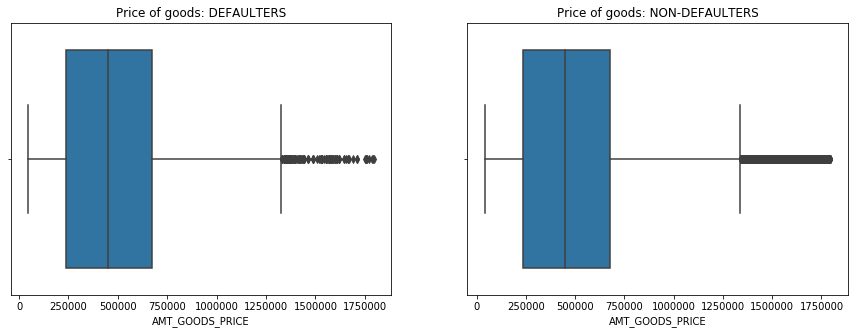

In [34]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(defaulter['AMT_GOODS_PRICE'])
plt.title('Price of goods: DEFAULTERS')
plt.subplot(1,2,2)
sns.boxplot(non_defaulter['AMT_GOODS_PRICE'])
plt.title('Price of goods: NON-DEFAULTERS')

#### REPORT: The prices for the goods is almost same for both the categories.

Text(0.5, 1.0, 'Gender-wise distribution of Non-Defaulters')

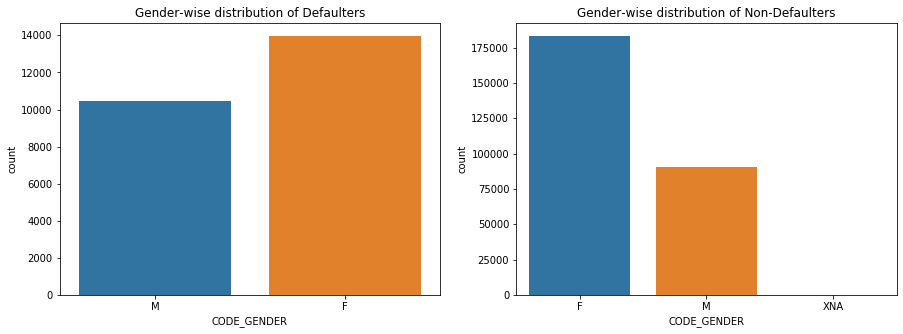

In [35]:
#UNIVARIATE: (CATEGORICAL)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER',data=defaulter)
plt.title('Gender-wise distribution of Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',data=non_defaulter)
plt.title('Gender-wise distribution of Non-Defaulters')

#### REPORT: It is observed that the males are more likely to not repay the loans on time.

Text(0.5, 1.0, 'Occupation of Non-Defaulters')

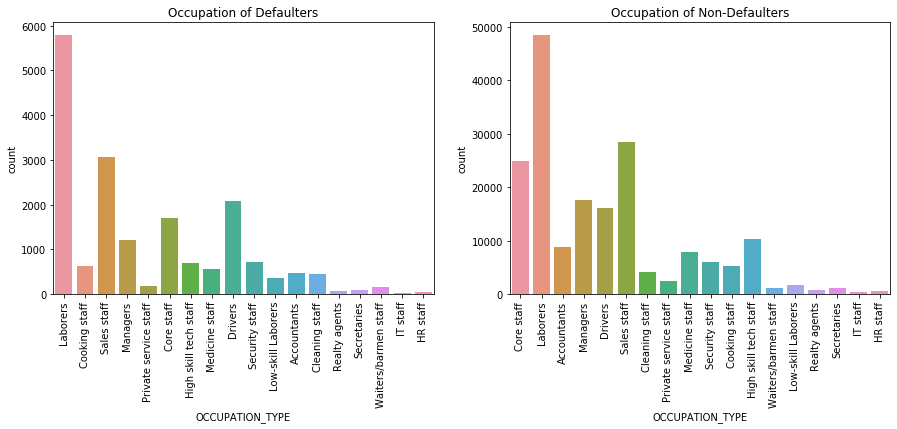

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart=sns.countplot(defaulter['OCCUPATION_TYPE'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('Occupation of Defaulters')
plt.subplot(1,2,2)
chart=sns.countplot(non_defaulter['OCCUPATION_TYPE'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('Occupation of Non-Defaulters')

#### REPORT: The Laborers and Sales staff clients are mostly the Non defaulters. (count of laborers: approx 490000) 

Text(0.5, 1.0, 'Level of Education of Non-Defaulters')

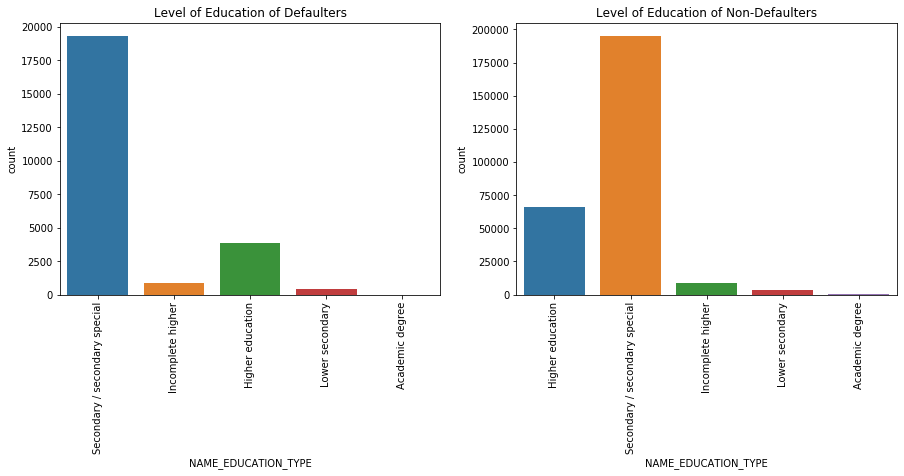

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart=sns.countplot(defaulter['NAME_EDUCATION_TYPE'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('Level of Education of Defaulters')
plt.subplot(1,2,2)
chart1=sns.countplot(non_defaulter['NAME_EDUCATION_TYPE'])
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
plt.title('Level of Education of Non-Defaulters')

#### REPORT: The clients with Secondary or Special secondary level of education are more likely to not pay the loan on time. Where as clients with higher education are likely to pay the loan on time.

Text(0.5, 1.0, 'Day on which Non-Defaulters apply for loan')

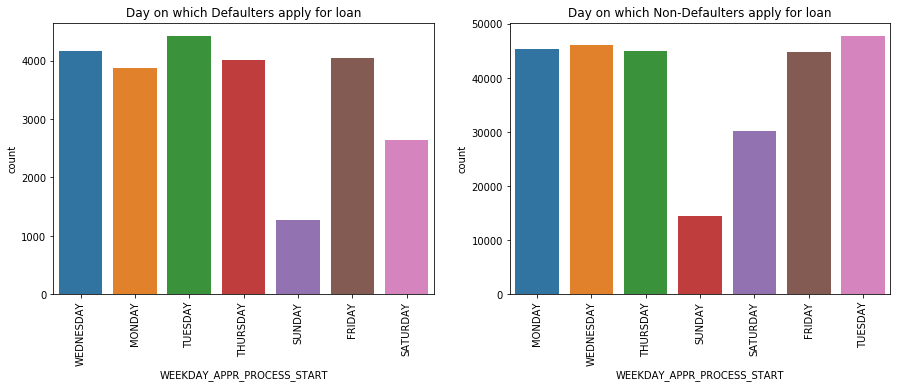

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart=sns.countplot(defaulter['WEEKDAY_APPR_PROCESS_START'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('Day on which Defaulters apply for loan')
plt.subplot(1,2,2)
chart1=sns.countplot(non_defaulter['WEEKDAY_APPR_PROCESS_START'])
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
plt.title('Day on which Non-Defaulters apply for loan')

#### REPORT: We can observe that clients doesnot apply for loan on Weekends . 

Text(0.5, 1.0, 'Income type of Non-Defaulters')

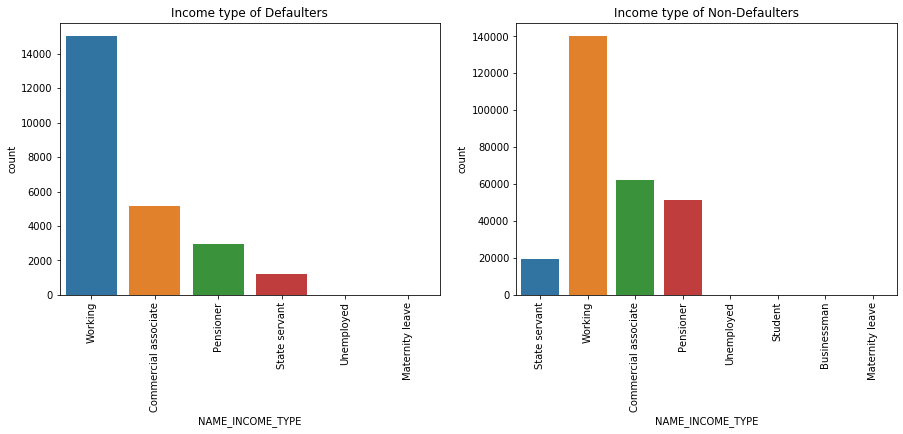

In [39]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart=sns.countplot(defaulter['NAME_INCOME_TYPE'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('Income type of Defaulters')
plt.subplot(1,2,2)
chart1=sns.countplot(non_defaulter['NAME_INCOME_TYPE'])
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=90)
plt.title('Income type of Non-Defaulters')

#### REPORT: The non-defaulter clients who are Working are most likely to repay the loans.

Text(0.5, 1, 'NON-DEFAULTERS:Age wise correlation of Income & Credits of Clients')

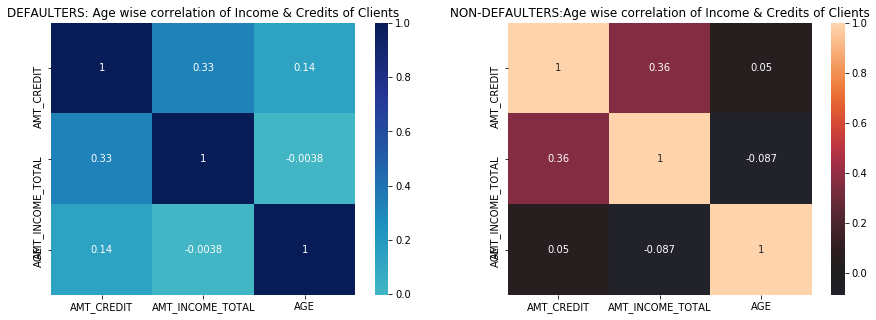

In [40]:
#BIVARIATE ANALYSIS(CONTINUOUS-CONTINUOUS)
corr_df1=defaulter[['AMT_CREDIT','AMT_INCOME_TOTAL','AGE']] #filtering required data.
corr_matrix1=corr_df1.corr()
corr_df2=non_defaulter[['AMT_CREDIT','AMT_INCOME_TOTAL','AGE']]
corr_matrix2=corr_df2.corr()
#plotting heatmaps
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.heatmap(corr_matrix1,annot=True,annot_kws={'size':10},center=0,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('DEFAULTERS: Age wise correlation of Income & Credits of Clients')
plt.subplot(1,2,2)
ax=sns.heatmap(corr_matrix2,annot=True,annot_kws={'size':10},center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('NON-DEFAULTERS:Age wise correlation of Income & Credits of Clients')

#### REPORT:  The correlation between  total income and the credit amount for Defaulters is less than that of Non-Defaulters. This may be reason for not paying the loans on time, as the income of the Defaulters may be less.

Text(0.5, 1, 'NON-DEFAULTERS:Correlation of Income of Client,Members and Children')

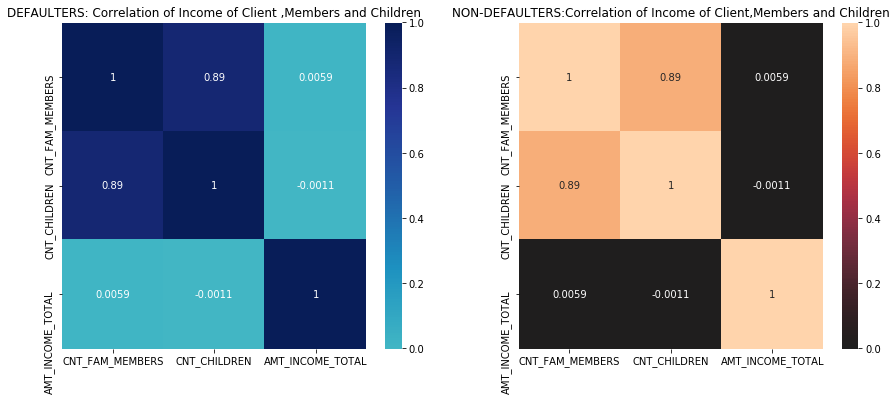

In [41]:
corr_df1=defaulter[['CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_INCOME_TOTAL']]
corr_matrix1=corr_df1.corr()
corr_df2=non_defaulter[['CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_INCOME_TOTAL']] # filtering data
corr_matrix2=corr_df2.corr()
#plotting heatmap
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.heatmap(corr_matrix1,annot=True,annot_kws={'size':10},center=0,cmap="YlGnBu")
bottom, top = ax.get_ylim()
plt.title('DEFAULTERS: Correlation of Income of Client ,Members and Children')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.subplot(1,2,2)
ax=sns.heatmap(corr_matrix1,annot=True,annot_kws={'size':10},center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('NON-DEFAULTERS:Correlation of Income of Client,Members and Children')

#### REPORT:  The correlation between the count of family members and the Income of client is almost same for both Defaulters and Non- Defaulters.

Text(0.5, 1.0, 'NON-DEFAULTER')

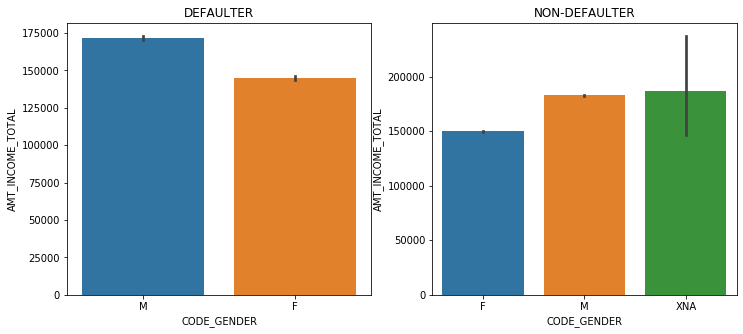

In [42]:

#BIVARIATE:(CONTINUOUS-CATEGORICAL)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=defaulter)
plt.title('DEFAULTER')
plt.subplot(1,2,2)
sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=non_defaulter)
plt.title('NON-DEFAULTER')

#### REPORT: The Males have high income than the females for both the categories. 

Text(0.5, 1.0, 'NON-DEFAULTER')

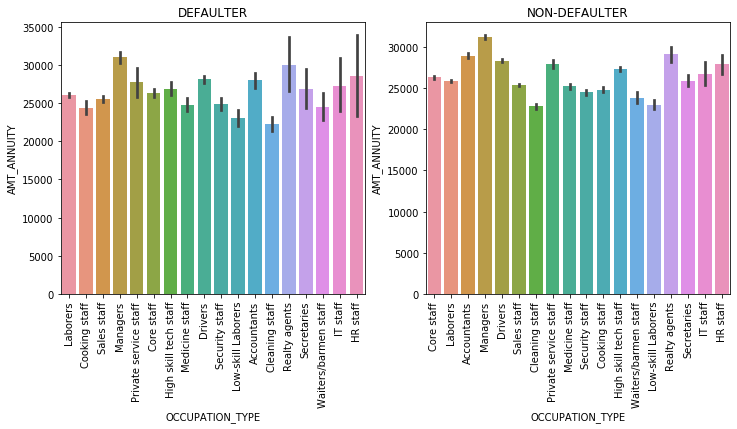

In [43]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
chart=sns.barplot(x='OCCUPATION_TYPE', y='AMT_ANNUITY', data=defaulter)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('DEFAULTER')
plt.subplot(1,2,2)
chart=sns.barplot(x='OCCUPATION_TYPE', y='AMT_ANNUITY', data=non_defaulter)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('NON-DEFAULTER')

#### REPORT: The annuity loan amount for Managers and Realty agents is higher for both Defaulters and Non-defaulters.

Text(0.5, 1.0, 'NON-DEFAULTER')

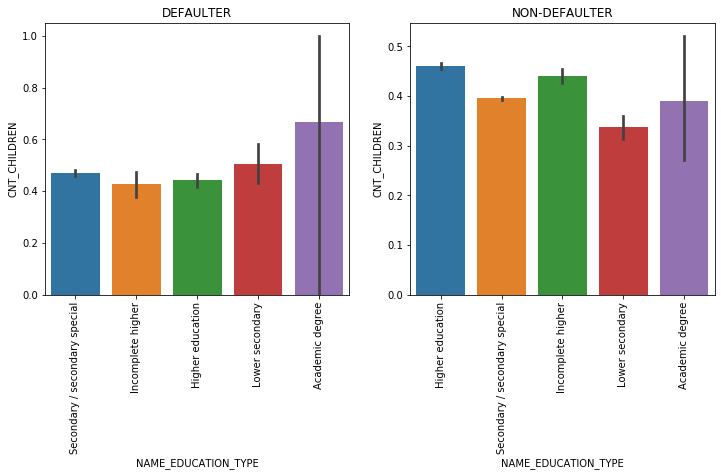

In [44]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
chart=sns.barplot(x='NAME_EDUCATION_TYPE', y='CNT_CHILDREN', data=defaulter)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('DEFAULTER')
plt.subplot(1,2,2)
chart=sns.barplot(x='NAME_EDUCATION_TYPE', y='CNT_CHILDREN', data=non_defaulter)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('NON-DEFAULTER')

#### REPORT: The Non-defaulter's children are highly educated than the Defaulter's children. People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.



Text(0.5, 1.0, 'NON-DEFAULTER')

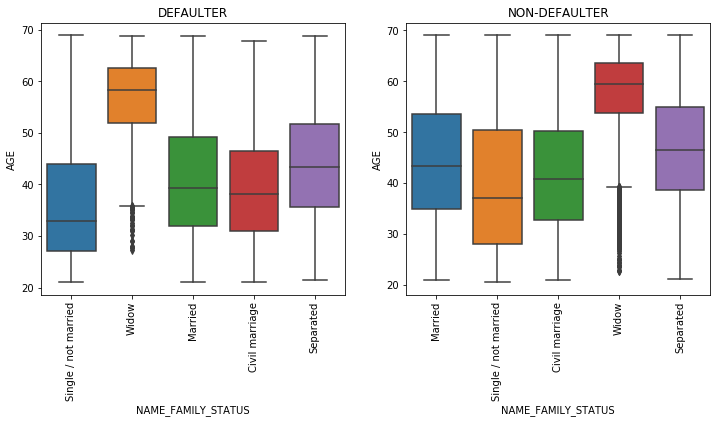

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
chart=sns.boxplot(x='NAME_FAMILY_STATUS', y='AGE', data=defaulter)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('DEFAULTER')
plt.subplot(1,2,2)
chart=sns.boxplot(x='NAME_FAMILY_STATUS', y='AGE', data=non_defaulter)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('NON-DEFAULTER')

#### REPORT: The single/unmarried clients are more likely to pay the loan.  The Ratio for Non-Defaulters is high than the Defaulters.

In [46]:
#CORRELATION OF DEFAULTERS AND NON-DEFAULTERS:
#collecting only numerical variables
corr_df=defaulter[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
        'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3',]]
corr_matrix=corr_df.corr()
corr_matrix


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3
CNT_CHILDREN,1.000000,-0.001059,0.002187,0.035937,-0.004400,-0.031646,0.260139,-0.192949,0.148680,-0.031081,0.885166,-0.022523,-0.011876,-0.020769
AMT_INCOME_TOTAL,-0.001059,1.000000,0.329047,0.406451,0.330146,0.110299,0.003758,-0.119572,0.037301,-0.001873,0.005946,0.078835,0.134606,-0.065793
AMT_CREDIT,0.002187,0.329047,1.000000,0.748863,0.981344,0.064717,-0.135466,0.002286,-0.027329,-0.051556,0.055657,0.027458,0.112443,0.082677
AMT_ANNUITY,0.035937,0.406451,0.748863,1.000000,0.746733,0.060420,-0.008672,-0.086510,0.038265,-0.012901,0.080747,0.027019,0.105254,0.039986
AMT_GOODS_PRICE,-0.004400,0.330146,0.981344,0.746733,1.000000,0.072421,-0.136357,0.007196,-0.027459,-0.055949,0.051967,0.040558,0.123034,0.083867
REGION_POPULATION_RELATIVE,-0.031646,0.110299,0.064717,0.060420,0.072421,1.000000,-0.047969,0.014961,-0.056493,-0.015471,-0.030687,0.140390,0.165354,-0.007919
DAYS_BIRTH,0.260139,0.003758,-0.135466,-0.008672,-0.136357,-0.047969,1.000000,-0.577654,0.289329,0.254370,0.204964,0.062275,-0.107945,-0.172034
DAYS_EMPLOYED,-0.192949,-0.119572,0.002286,-0.086510,0.007196,0.014961,-0.577654,1.000000,-0.190072,-0.226903,-0.187749,-0.058787,0.000183,0.093245
DAYS_REGISTRATION,0.148680,0.037301,-0.027329,0.038265,-0.027459,-0.056493,0.289329,-0.190072,1.000000,0.096399,0.145898,-0.033698,-0.070141,-0.084908
DAYS_ID_PUBLISH,-0.031081,-0.001873,-0.051556,-0.012901,-0.055949,-0.015471,0.254370,-0.226903,0.096399,1.000000,-0.029924,0.020397,-0.059973,-0.129102


### Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

(14.0, 0.0)

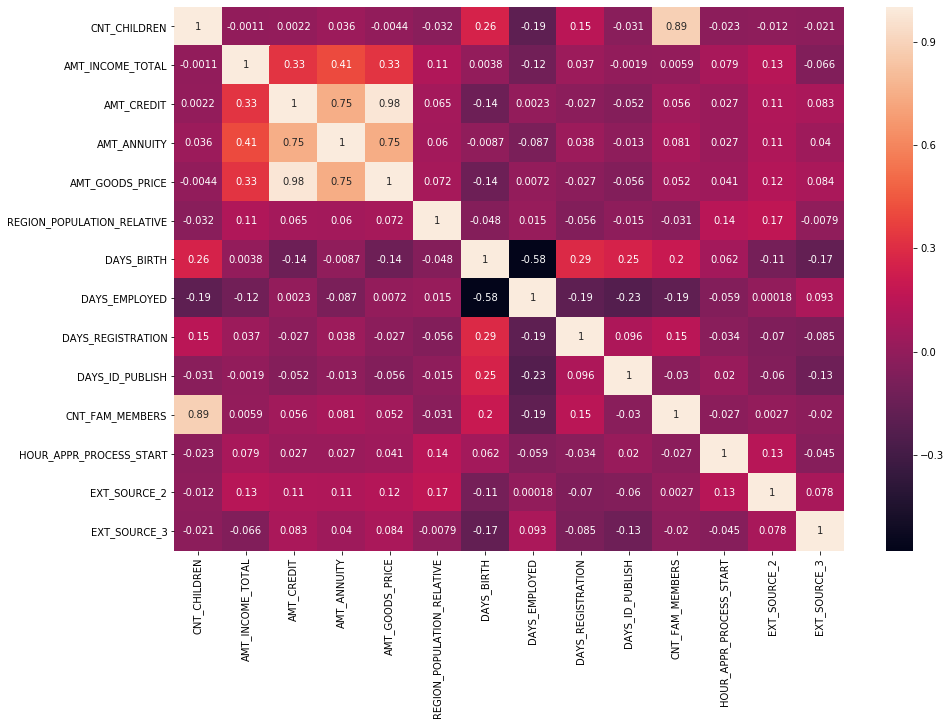

In [47]:
#plotting a heatmap for the correlation matrix.
plt.figure(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [48]:
df=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [49]:
df=df.unstack().reset_index()


In [50]:
df.columns=['VAR1','VAR2','CORRELATION'] # renaming the columns
df 

,VAR1,VAR2,CORRELATION
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN
5,CNT_CHILDREN,REGION_POPULATION_RELATIVE,NaN
6,CNT_CHILDREN,DAYS_BIRTH,NaN
7,CNT_CHILDREN,DAYS_EMPLOYED,NaN
8,CNT_CHILDREN,DAYS_REGISTRATION,NaN
9,CNT_CHILDREN,DAYS_ID_PUBLISH,NaN


In [51]:
df.dropna(subset=['CORRELATION'],inplace=True)

In [52]:
df.CORRELATION=abs(df.CORRELATION) # getting the abosulte value.
df.sort_values('CORRELATION',ascending=False)


,VAR1,VAR2,CORRELATION
58,AMT_GOODS_PRICE,AMT_CREDIT,0.981344
140,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885166
44,AMT_ANNUITY,AMT_CREDIT,0.748863
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.746733
104,DAYS_EMPLOYED,DAYS_BIRTH,0.577654
43,AMT_ANNUITY,AMT_INCOME_TOTAL,0.406451
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.330146
29,AMT_CREDIT,AMT_INCOME_TOTAL,0.329047
118,DAYS_REGISTRATION,DAYS_BIRTH,0.289329
84,DAYS_BIRTH,CNT_CHILDREN,0.260139


#### TOP 10 CORRELATIONS FOR TARGET=1 (DEFAULTERS) ARE:
##### 1. AMT_GOODS_PRICE & AMT_CREDIT
##### 2. CNT_FAM_MEMBERS & CNT_CHILDREN
##### 3. AMT_ANNUITY & AMT_CREDIT
##### 4. AMT_GOODS_PRICE & AMT_ANNUITY
##### 5. DAYS_EMPLOYED & DAYS_BIRTH
##### 6. AMT_ANNUITY & AMT_INCOME_TOTAL
##### 7. AMT_GOODS_PRICE & AMT_INCOME_TOTAL
##### 8. AMT_CREDIT & AMT_INCOME_TOTAL
##### 9. DAYS_REGISTRATION & DAYS_BIRTH
##### 10. DAYS_BIRTH & CNT_CHILDREN

In [53]:
#NON-DEFAULTERS: CORRELATION
corr_df2=non_defaulter[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
        'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3',]]
corr_matrix2=corr_df2.corr()
corr_matrix2


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3
CNT_CHILDREN,1.000000,0.031262,0.003649,0.023379,-0.000409,-0.025067,0.338627,-0.245599,0.187373,-0.027764,0.877939,-0.005199,-0.015707,-0.042287
AMT_INCOME_TOTAL,0.031262,1.000000,0.363990,0.440186,0.367431,0.172734,0.087067,-0.179905,0.075950,0.032426,0.037315,0.087087,0.157791,-0.093571
AMT_CREDIT,0.003649,0.363990,1.000000,0.777328,0.985208,0.074498,-0.049725,-0.069235,0.007266,-0.000385,0.065753,0.044055,0.113306,0.029648
AMT_ANNUITY,0.023379,0.440186,0.777328,1.000000,0.777258,0.093207,0.018021,-0.110867,0.037176,0.018629,0.080547,0.043799,0.110724,0.015034
AMT_GOODS_PRICE,-0.000409,0.367431,0.985208,0.777258,1.000000,0.077796,-0.047670,-0.067462,0.009525,-0.002681,0.064211,0.053840,0.120481,0.032252
REGION_POPULATION_RELATIVE,-0.025067,0.172734,0.074498,0.093207,0.077796,1.000000,-0.026630,-0.003735,-0.053389,-0.002627,-0.024728,0.164908,0.190607,-0.011003
DAYS_BIRTH,0.338627,0.087067,-0.049725,0.018021,-0.047670,-0.026630,1.000000,-0.622353,0.334759,0.276363,0.287660,0.096932,-0.078763,-0.198869
DAYS_EMPLOYED,-0.245599,-0.179905,-0.069235,-0.110867,-0.067462,-0.003735,-0.622353,1.000000,-0.211744,-0.277923,-0.239364,-0.095797,-0.028101,0.109595
DAYS_REGISTRATION,0.187373,0.075950,0.007266,0.037176,0.009525,-0.053389,0.334759,-0.211744,1.000000,0.101518,0.176853,-0.008017,-0.053920,-0.104936
DAYS_ID_PUBLISH,-0.027764,0.032426,-0.000385,0.018629,-0.002681,-0.002627,0.276363,-0.277923,0.101518,1.000000,-0.019366,0.035068,-0.042036,-0.125505


(14.0, 0.0)

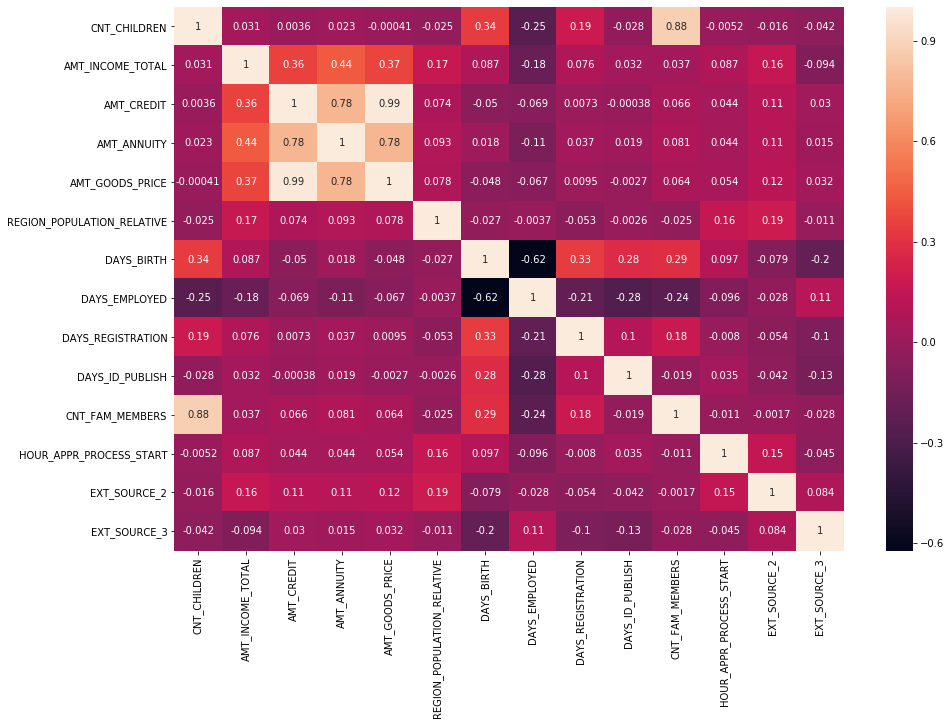

In [54]:
#PLOTTING THE HEATMAP
plt.figure(figsize=(15,10))
ax=sns.heatmap(corr_matrix2,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [55]:
df2=corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape),k=1).astype(np.bool))


In [56]:
df2=df2.unstack().reset_index()


In [57]:
df2.columns=['VAR1','VAR2','CORRELATION'] # RENAMING THE COLUMNS
df2

,VAR1,VAR2,CORRELATION
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN
5,CNT_CHILDREN,REGION_POPULATION_RELATIVE,NaN
6,CNT_CHILDREN,DAYS_BIRTH,NaN
7,CNT_CHILDREN,DAYS_EMPLOYED,NaN
8,CNT_CHILDREN,DAYS_REGISTRATION,NaN
9,CNT_CHILDREN,DAYS_ID_PUBLISH,NaN


In [58]:
df2.dropna(subset=['CORRELATION'],inplace=True)

In [59]:
df2.CORRELATION=abs(df2.CORRELATION) #CONSIDERING THE ABSOLUTE VALUE OF CORRELATION.
df2.sort_values('CORRELATION',ascending=False)


,VAR1,VAR2,CORRELATION
58,AMT_GOODS_PRICE,AMT_CREDIT,0.985208
140,CNT_FAM_MEMBERS,CNT_CHILDREN,0.877939
44,AMT_ANNUITY,AMT_CREDIT,0.777328
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.777258
104,DAYS_EMPLOYED,DAYS_BIRTH,0.622353
43,AMT_ANNUITY,AMT_INCOME_TOTAL,0.440186
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.367431
29,AMT_CREDIT,AMT_INCOME_TOTAL,0.363990
84,DAYS_BIRTH,CNT_CHILDREN,0.338627
118,DAYS_REGISTRATION,DAYS_BIRTH,0.334759


#### TOP 10 CORRELATIONS FOR TARGET=0 (NON-DEFAULTERS) ARE:
##### 1. AMT_GOODS_PRICE & AMT_CREDIT
##### 2. CNT_FAM_MEMBERS & CNT_CHILDREN
##### 3. AMT_ANNUITY & AMT_CREDIT
##### 4. AMT_GOODS_PRICE & AMT_ANNUITY
##### 5. DAYS_EMPLOYED & DAYS_BIRTH
##### 6. AMT_ANNUITY & AMT_INCOME_TOTAL
##### 7. AMT_GOODS_PRICE & AMT_INCOME_TOTAL
##### 8. AMT_CREDIT & AMT_INCOME_TOTAL
##### 9. DAYS_REGISTRATION & DAYS_BIRTH
##### 10. DAYS_BIRTH & CNT_CHILDREN

####  REPORT: After comparing both Defaulter's data and Non-defaulter's data, we can observe that most of the variables are similarly correlated for both the data sets.

In [60]:
#LOADING THE PREVIOUS APPLICATION DATA:
prev_data=pd.read_csv(r"E:\data science\EDA_CASE_STUDY\previous_application.csv")
prev_data.head()
                      

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#ROUTINE CHECK OF THE DATA:
prev_data.shape

(1670214, 37)

In [62]:
#LIST OF COLUMNS IN THE PREVIOUS APPLICATION DATA:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [63]:
#MERGING THE APPLICATION DATA AND PREVIOUS APPLICATION DATA ON 'SK_ID_CURR' VARIABLE
merged_data = new_df.merge(prev_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,Laborers,1.0,WEDNESDAY,10,0,0,Business Entity Type 3,0.262949,0.139376,No,1,0,0,0,25.920548,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,NaN,No,1,0,0,0,45.931507,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,NaN,No,1,0,0,0,45.931507,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,NaN,No,1,0,0,0,45.931507,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,Laborers,1.0,MONDAY,9,0,0,Government,0.555912,0.729567,NaN,0,0,0,0,52.180822,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [64]:
#CHECKING THE DATATYPES AND OTHER INFORMATION OF THE MERGED DATA.
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377237 entries, 0 to 1377236
Data columns (total 72 columns):
SK_ID_CURR                      1377237 non-null int64
TARGET                          1377237 non-null int64
NAME_CONTRACT_TYPE_x            1377237 non-null object
CODE_GENDER                     1377237 non-null object
FLAG_OWN_CAR                    1377237 non-null object
FLAG_OWN_REALTY                 1377237 non-null object
CNT_CHILDREN                    1377237 non-null int64
AMT_INCOME_TOTAL                1377237 non-null float64
AMT_CREDIT_x                    1377237 non-null float64
AMT_ANNUITY_x                   1377237 non-null float64
AMT_GOODS_PRICE_x               1377237 non-null float64
NAME_TYPE_SUITE_x               1374976 non-null object
NAME_INCOME_TYPE                1377237 non-null object
NAME_EDUCATION_TYPE             1377237 non-null object
NAME_FAMILY_STATUS              1377237 non-null object
NAME_HOUSING_TYPE               1377237 non-nu

In [65]:
#SEGMENTING THE MERGED DATA ON THE BASIS OF CONTRACT STATUS.
approved=merged_data[merged_data.NAME_CONTRACT_STATUS=='Approved']
refused=merged_data[merged_data.NAME_CONTRACT_STATUS=='Refused']
canceled=merged_data[merged_data.NAME_CONTRACT_STATUS=='Canceled']
unused=merged_data[merged_data.NAME_CONTRACT_STATUS=='Unused Offer']

Text(0.5, 1.0, 'CANCELLED')

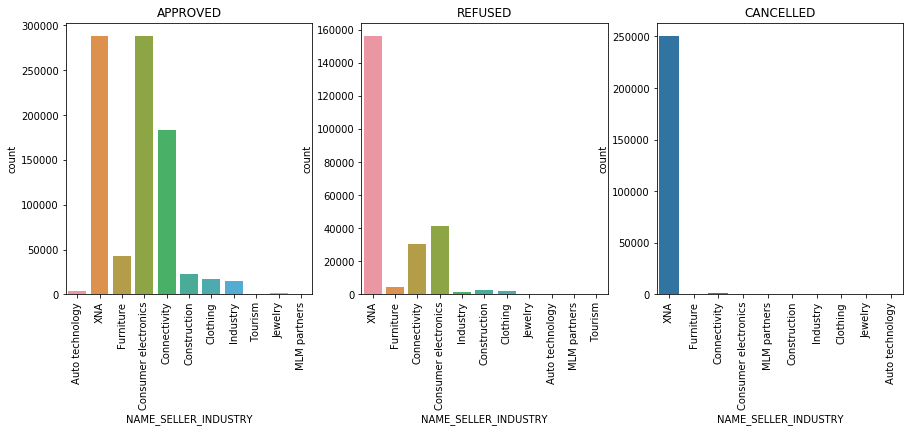

In [66]:
#UNIVARIATE ANALYSIS FOR APPROVED AND REFUSED LOAN.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
chart=sns.countplot(x='NAME_SELLER_INDUSTRY',data=approved)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('APPROVED')
plt.subplot(1,3,2)
chart=sns.countplot(x='NAME_SELLER_INDUSTRY',data=refused)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('REFUSED')
plt.subplot(1,3,3)
chart=sns.countplot(x='NAME_SELLER_INDUSTRY',data=canceled)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('CANCELLED')


#### REPORT: The loans are mostly approved for Consumer electronics and Connectivity industry

Text(0.5, 1.0, 'CANCELED')

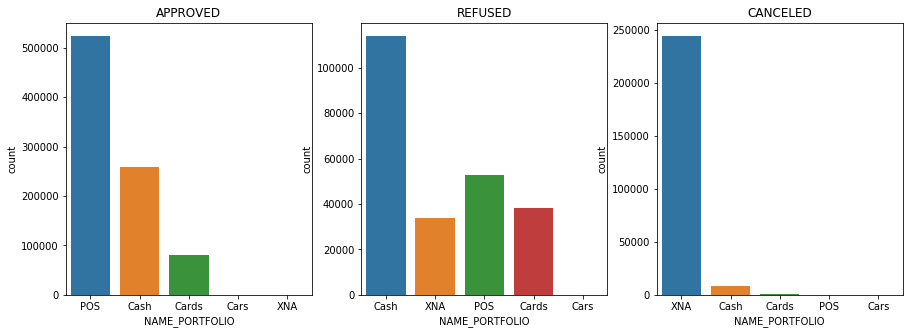

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x='NAME_PORTFOLIO',data=approved)
plt.title('APPROVED')
plt.subplot(1,3,2)
sns.countplot(x='NAME_PORTFOLIO',data=refused)
plt.title('REFUSED')
plt.subplot(1,3,3)
sns.countplot(x='NAME_PORTFOLIO',data=canceled)
plt.title('CANCELED')

#### REPORT: Most approved loans were POS.Most refused loans were Cash. This may be a good sign since additional exposure have not been increased, the loans were absorbed from existing loans.


<Figure size 720x360 with 0 Axes>

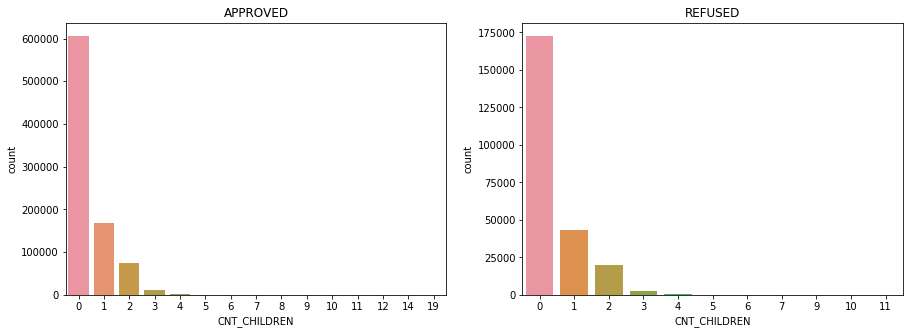

<Figure size 720x360 with 0 Axes>

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='CNT_CHILDREN',data=approved)
plt.title('APPROVED')
plt.subplot(1,2,2)
sns.countplot(x='CNT_CHILDREN',data=refused)
plt.title('REFUSED')
plt.figure(figsize=(10,5))


#### REPORT: It is observed that children are not applicable for applying loans.

Text(0.5, 1.0, 'REFUSED')

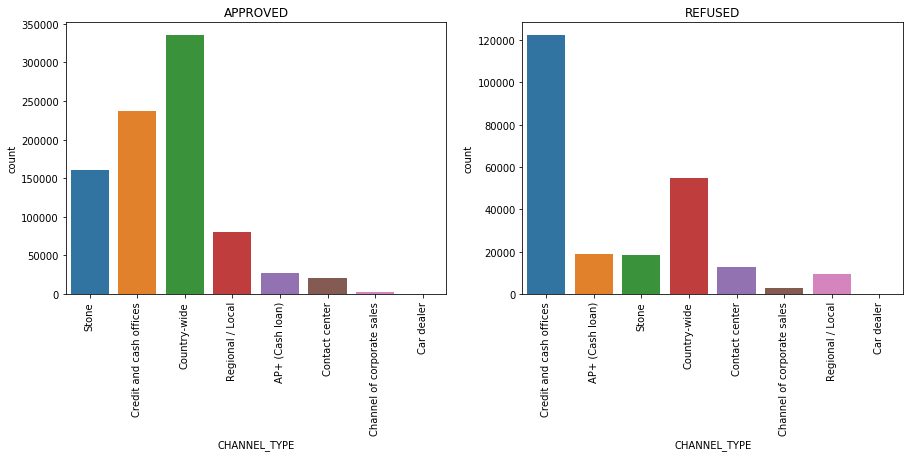

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart=sns.countplot(x='CHANNEL_TYPE',data=approved)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('APPROVED')
plt.subplot(1,2,2)
chart=sns.countplot(x='CHANNEL_TYPE',data=refused)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('REFUSED')



#### REPORT: 1. Most approved loans were from Country-wide Channel.
#### 2. Most refused loans were from Credit and Cash Offices Channel

Text(0.5, 1.0, 'REFUSED')

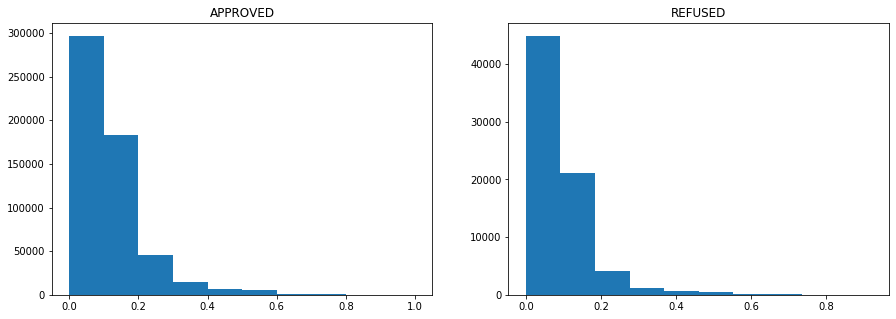

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(approved['RATE_DOWN_PAYMENT'])
plt.title('APPROVED')
plt.subplot(1,2,2)
plt.hist(refused['RATE_DOWN_PAYMENT'])
plt.title('REFUSED')

#### REPORT: The down payment rate for approved loan is high than the refused loans.

Text(0.5, 1.0, 'REFUSED')

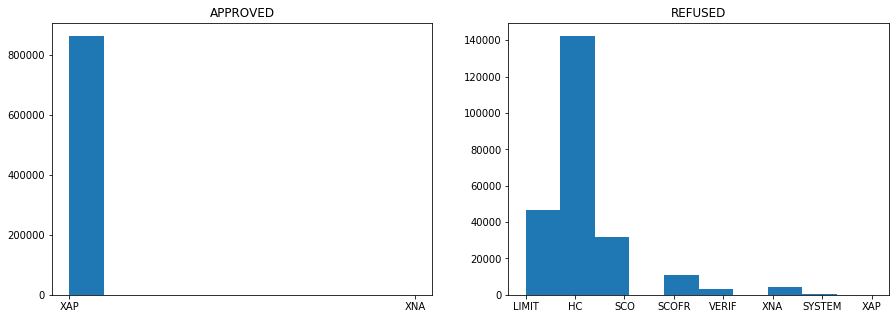

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(approved['CODE_REJECT_REASON'])
plt.title('APPROVED')
plt.subplot(1,2,2)
plt.hist(refused['CODE_REJECT_REASON'])
plt.title('REFUSED')

#### REPORT: We can observe that the reject reasons are obviously more for the refused loans.

Text(0.5, 1.0, 'REFUSED')

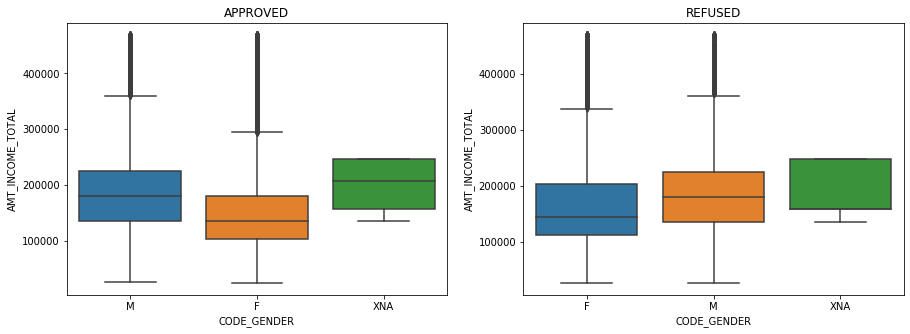

In [72]:
#BIVARIATE ANALYSIS:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=approved)
plt.title('APPROVED')

plt.subplot(1,2,2)
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=refused)
plt.title('REFUSED')

#### REPORT: The total income for males is higher than that of Females.

Text(0.5, 1.0, 'REFUSED')

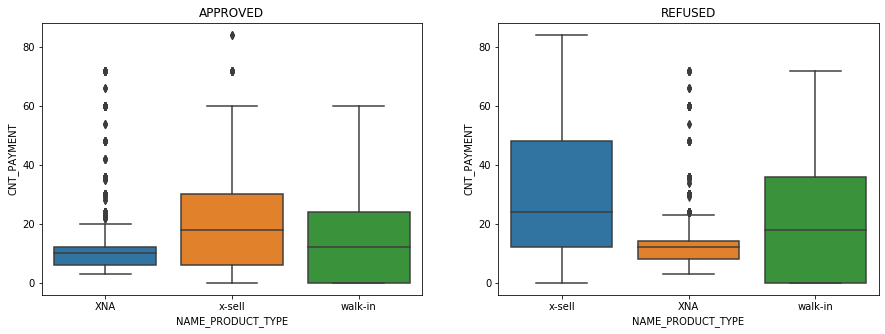

In [73]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='NAME_PRODUCT_TYPE',y='CNT_PAYMENT',data=approved)
plt.title('APPROVED')

plt.subplot(1,2,2)
sns.boxplot(x='NAME_PRODUCT_TYPE',y='CNT_PAYMENT',data=refused)
plt.title('REFUSED')


#### REPORT: The term of previous credit application is high for x-sell than walk-in. Most number of refused loans were of Cash X-Sell: Low Product combination.

Text(0.5, 1.0, 'REFUSED')

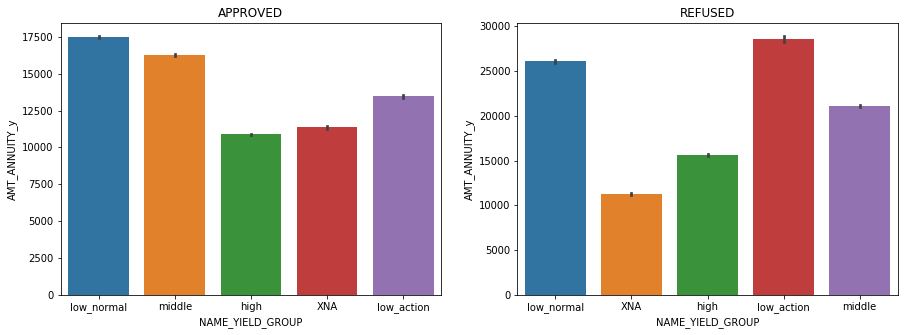

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='NAME_YIELD_GROUP',y='AMT_ANNUITY_y',data=approved)
plt.title('APPROVED')

plt.subplot(1,2,2)
sns.barplot(x='NAME_YIELD_GROUP',y='AMT_ANNUITY_y',data=refused)
plt.title('REFUSED')


#### REPORT: There is high percent of interest rate for approved loans based on the annuity amount. Most approved loans were from Middle Yield Goup. Most refused loans were from Yield Goups Not specified

In [75]:
#Correlation of all variables for Approved loans.
#Filtered refused loan data.
approved_df=approved[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE',
        'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START_x', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY','AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y', 'SELLERPLACE_AREA',
       'CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION']]


In [76]:
#correlation matrix
approved_mat=approved_df.corr()
approved_mat

,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION
CNT_CHILDREN,1.000000,0.025878,-0.023199,0.882344,0.000052,0.031715,0.083280,-0.044329,-0.051398,-0.053348,-0.001994,-0.054679,0.018595,-0.000323,-0.053522,0.005098,-0.011015,-0.009470
AMT_INCOME_TOTAL,0.025878,1.000000,0.154245,0.031067,0.086899,0.015308,0.034421,0.225333,0.171901,0.174363,0.079663,0.181217,0.106257,0.006410,0.031905,-0.000953,0.010163,0.010279
REGION_POPULATION_RELATIVE,-0.023199,0.154245,1.000000,-0.022988,0.151757,-0.045635,-0.034903,0.077833,0.053495,0.054770,0.023937,0.056701,0.148931,0.002492,0.001598,0.001474,-0.004605,-0.003689
CNT_FAM_MEMBERS,0.882344,0.031067,-0.022988,1.000000,-0.004297,0.025546,0.086146,-0.010878,-0.014524,-0.014252,0.001075,-0.015580,0.007790,-0.000399,-0.030365,0.006469,-0.006682,-0.004824
HOUR_APPR_PROCESS_START_x,0.000052,0.086899,0.151757,-0.004297,1.000000,0.016681,0.023661,0.009740,0.005216,0.005238,0.007741,0.005957,0.385371,0.006072,-0.011713,0.002711,-0.004911,-0.004756
REG_CITY_NOT_LIVE_CITY,0.031715,0.015308,-0.045635,0.025546,0.016681,1.000000,0.430940,-0.023457,-0.028074,-0.028535,-0.005589,-0.030252,0.027771,0.003301,-0.027627,0.003418,0.005132,0.003615
REG_CITY_NOT_WORK_CITY,0.083280,0.034421,-0.034903,0.086146,0.023661,0.430940,1.000000,-0.029814,-0.035659,-0.034684,-0.004836,-0.037214,0.020856,0.000305,-0.034741,0.000583,-0.003635,-0.002591
AMT_ANNUITY_y,-0.044329,0.225333,0.077833,-0.010878,0.009740,-0.023457,-0.029814,1.000000,0.814712,0.828839,0.247820,0.832822,-0.042573,-0.011365,0.358538,-0.048904,0.099772,0.083809
AMT_APPLICATION,-0.051398,0.171901,0.053495,-0.014524,0.005216,-0.028074,-0.035659,0.814712,1.000000,0.960306,0.437795,1.000000,-0.044926,-0.010637,0.657080,-0.047947,0.190312,0.164970
AMT_CREDIT_y,-0.053348,0.174363,0.054770,-0.014252,0.005238,-0.028535,-0.034684,0.828839,0.960306,1.000000,0.243888,0.993348,-0.053726,-0.012962,0.634836,0.006035,0.243899,0.232644


Text(0.5, 1, 'CORRELATION FOR APPROVED LOANS')

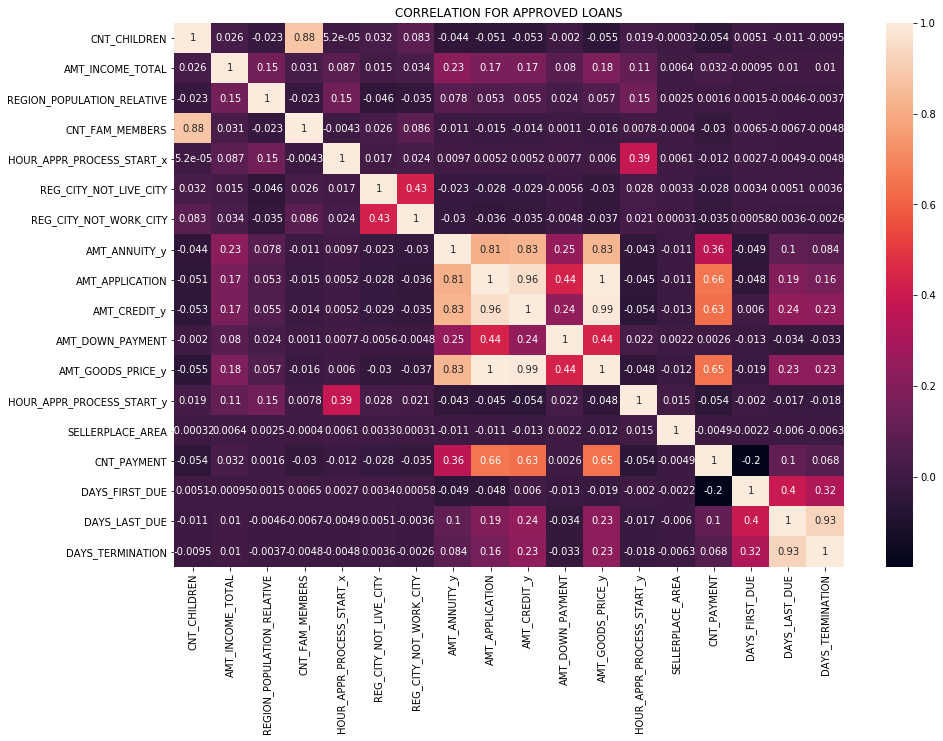

In [77]:
#plotting the heatmap for the Correlation.
plt.figure(figsize=(15,10))
ax=sns.heatmap(approved_mat,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('CORRELATION FOR APPROVED LOANS')

In [78]:
#Correlation of all variables for Refused loans.
#Filtered refused loan data.
refused_df=refused[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE',
        'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START_x', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY','AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y', 'SELLERPLACE_AREA',
       'CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION']]

In [79]:
#Correlation matrix
refused_mat=refused_df.corr()

Text(0.5, 1, 'CORRELATION FOR REFUSED LOANS')

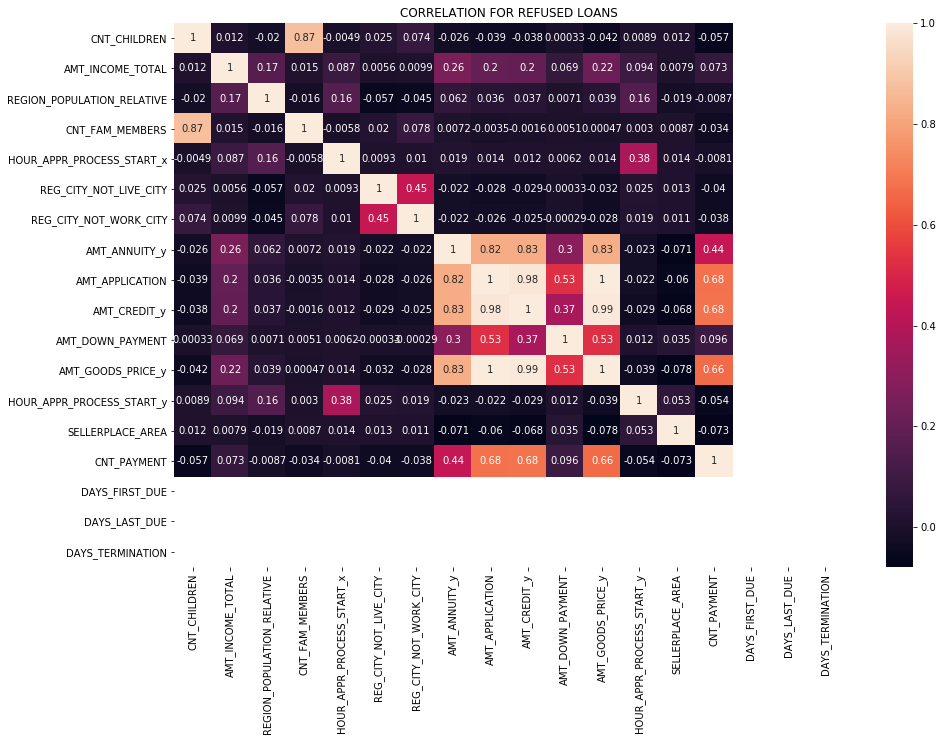

In [80]:
#Plotting heatmap for correlation.
plt.figure(figsize=(15,10))
ax=sns.heatmap(refused_mat,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('CORRELATION FOR REFUSED LOANS')

#### REPORT: The Refused loans have a negative correlation. 


## HIGHLIGHTS:
#### The Ratio of Data Imbalance is: 11.205 .
#### The number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1 
#### The number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1. 
#### People with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers